In [277]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

g = 9.8
t0 = 0

m1 = 10
m2 = 10
l1 = 1
l2 = 1

M = m2 / m1
L = l2 / l1

def tau(t):
    return np.sqrt(g / l1) * (t - t0)

def F1(U):
    return U
def F2(theta1, U, theta2, V):
    theta1 = np.radians(theta1)
    theta2 = np.radians(theta2)
    return (M * np.sin(theta2 - theta1) * (L * V**2 + np.cos(theta2)) + M / 2 * np.sin(2 * (theta2 - theta1)) * U**2 - np.sin(theta1)) / (1 + M * (np.sin(theta2 - theta1))**2)
def F3(V):
    return V
def F4(theta1, U, theta2, V):
    theta1 = np.radians(theta1)
    theta2 = np.radians(theta2)
    return -1 * (1 / L * np.sin(theta2) + 1 / L * np.sin(theta2 - theta1) * U**2 + 1 / L * np.cos(theta2 - theta1) * F2(theta1, U, theta2, V))

def n(theta1n, Un, theta2n, Vn, t, tstop):
    
    t = np.linspace(t,tstop, tstop * 100)
    
    theta1n = np.radians(theta1n)
    theta2n = np.radians(theta2n)
    
    K1 = F1(Un)
    L1 = F2(theta1n, Un, theta2n, Vn)
    M1 = F3(Vn)
    N1 = F4(theta1n, Un, theta2n, Vn)
    
    K2 = F1(Un + L1 * tau(t) / 2)
    L2 = F2(theta1n + K1 * tau(t) / 2, Un + L1 * tau(t) / 2, theta2n + M1 * tau(t) / 2, Vn + N1 * tau(t) / 2)
    M2 = F3(Vn + N1 * tau(t) / 2)
    N2 = F4(theta1n + K1 * tau(t) / 2, Un + L1 * tau(t) / 2, theta2n + M1 * tau(t) / 2, Vn + N1 * tau(t) / 2)
    
    K3 = F1(Un + L2 * tau(t) / 2)
    L3 = F2(theta1n + K2 * tau(t) / 2, Un + L2 * tau(t) / 2, theta2n + M2 * tau(t) / 2, Vn + N2 * tau(t) / 2)
    M3 = F3(Vn + N2 * tau(t) / 2)
    N3 = F4(theta1n + K2 * tau(t) / 2, Un + L2 * tau(t) / 2, theta2n + M2 * tau(t) / 2, Vn + N2 * tau(t) / 2)
    
    K4 = F1(Un + L3 * tau(t))
    L4 = F2(theta1n + K3 * tau(t), Un + L3 * tau(t), theta2n + M3 * tau(t), Vn + N3 * tau(t))
    M4 = F3(Vn + N3 * tau(t))
    N4 = F4(theta1n + K3 * tau(t), Un + L3 * tau(t), theta2n + M3 * tau(t), Vn + N3 * tau(t))
    
    theta1np1 = theta1n + tau(t) / 6 *(K1 + 2 * K2 + 2 * K3 + K4)
    omega1np1 = Un + tau(t) / 6 * (L1 + 2 * L2 + 2 * L3 + L4)
    theta2np1 = theta2n + tau(t) / 6 * (M1 + 2 * M2 + 2 * M3 + M4)
    omega2np1 = Vn + tau(t) / 6 * (N1 + 2 * N2 + 2 * N3 + N4)

    x1 = l1 * np.sin(theta1np1)
    x2 = l1 * np.sin(theta1np1) + l2 * np.sin(theta2np1)
    y1 = l1 * np.cos(theta1np1)
    y2 = l1 * np.cos(theta2np1) + l2 * np.sin(theta2np1)

    plt.xlim(-2,2)
    plt.ylim(-2,2)
    
    plt.plot(x1,y1,'r-')
    plt.plot(x2,y2,'b-')
    plt.plot(x1[-1],y1[-1],'ro')
    plt.plot(x2[-1],y2[-1],'bo')
    plt.plot([0, x1[-1]], [0, y1[-1]], 'black')
    plt.plot([x1[-1], x2[-1]], [y1[-1], y2[-1]], 'black')
    
    
    theta1n = theta1np1
    theta2n = theta2np1
    Un = omega1np1
    Vn = omega2np1
    t = t0
        
plt.show()

<IPython.core.display.Javascript object>


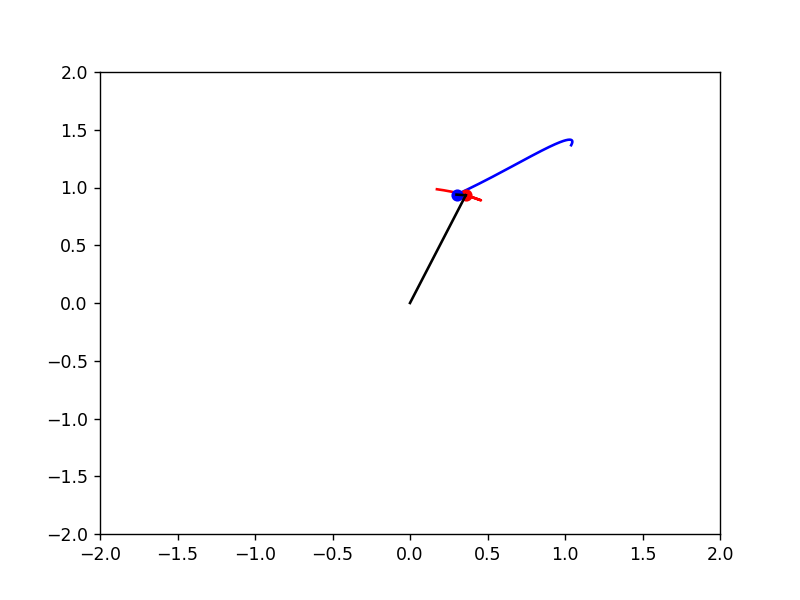

In [279]:
n(10,0,60,0,0,4)